# Metropolis-Hastings Algorithm

Let $q(\theta, \vartheta)$ be a *proposal density* or a *candidate-generating density* ([Chib and Greenberg, 1995](http://www2.stat.duke.edu/~scs/Courses/Stat376/Papers/Basic/ChibGreenberg1995.pdf)) such that
\begin{eqnarray}
 \int q(\theta, \vartheta) d\vartheta = 1
\end{eqnarray}
Also let $U(O, 1)$ denote the uniform distribution over $(0, 1)$. Then, a general version of the Metropolis- Hastings algorithm for sampling from the posterior distribution $\pi(\theta,D)$ can be described as follows:

- Choose an arbitrary starting point $\theta_0$ and set $i=0$.
- Generate a candidate point $\theta^*$ from $q(\theta_i,\cdot)$ and $u$ from $U(0,1)$.
- Set $\theta_{i+1}=\theta^*$ if $u \leq a(\theta_i, \theta^*)$ and $\theta_{i+1}=\theta_i$ otherwise, where the acceptance probability is given by
\begin{eqnarray}
 a(\theta,\vartheta) = \min\big\{
                        \frac{ \pi(\vartheta|D)q(\vartheta, \theta) }{ \pi(\theta|D)q(\theta, \vartheta) },
                        1
                        \big\}
\end{eqnarray}
- Set $i=i+1$, and go to Step 2.

## Algorithm

Given $x^{(t)}$

1. Generate $Y_t \sim q(y|x^{(t)})$.
2. Take
   $$
    \begin{equation}
    X(t+1) = 
    \begin{cases}
    Y_t      & \text{with probability } \rho(x^{(t)},Y_t) \\
    x^{(t)}  & \text{with probability} 1 - \rho(x^{(t)},Y_t)
    \end{cases}
    \end{equation}
   $$
   where
   $$
    \rho(x,y) = \min
    \left\{
    \begin{array}{lr}
       \frac{f(y)}{f(x)} \frac{q(x|y)}{q(y|x)},  & 1  
    \end{array}
    \right\} 
   $$

## Example 1

Let us consider the following simple linear model:
\begin{eqnarray}
 y_t = \alpha x_t + \beta + \epsilon_t
\end{eqnarray}
where $\epsilon \sim N(0, \sigma^2)$.

In [1]:
import Pkg
Pkg.add("StatsBase")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [2913bbd2] + StatsBase v0.34.3
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [3]:
using Distributions, Plots, StatsBase, Random

### Creating test data
trueA = 5
trueB = 0
trueSd = 10
sampleSize = 31

# Create independent x-values
x = -((sampleSize - 1) ÷ 2):((sampleSize - 1) ÷ 2)
# Create dependent values according to ax + b + N(0, sd)
y = trueA * x .+ trueB .+ rand(Normal(0, trueSd), sampleSize)

plot(x, y, title="Test Data", xlabel="x", ylabel="y")

### Deriving the likelihood
function likelihood(param)
    a, b, sd = param
    pred = a .* x .+ b
    singlelikelihoods = logpdf.(Normal.(pred, sd), y)
    sumll = sum(singlelikelihoods)
    return sumll
end

likelihood (generic function with 1 method)

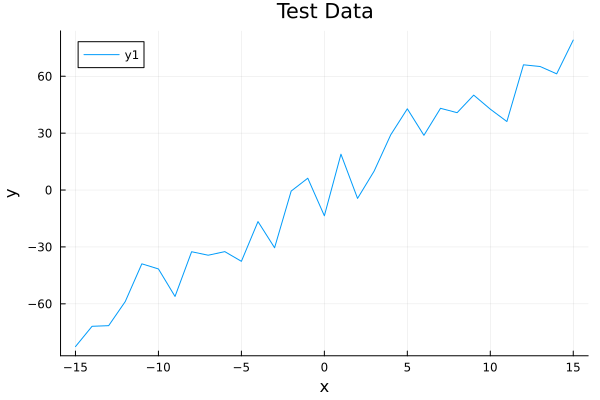

In [17]:
# 1. Creating Test Data
using Plots
using Distributions

trueA = 5
trueB = 0
trueSd = 10
sampleSize = 31

x = -((sampleSize - 1) / 2):((sampleSize - 1) / 2)
y = trueA .* x .+ trueB .+ rand(Normal(0, trueSd), sampleSize)

plot(x, y, title="Test Data", xlabel="x", ylabel="y")

In [18]:
# 2. Deriving the Likelihood Function
function likelihood(param)
    a, b, sd = param
    pred = a .* x .+ b
    singlelikelihoods = logpdf.(Normal.(pred, sd), y)
    sumll = sum(singlelikelihoods)
    return sumll
end

likelihood (generic function with 1 method)

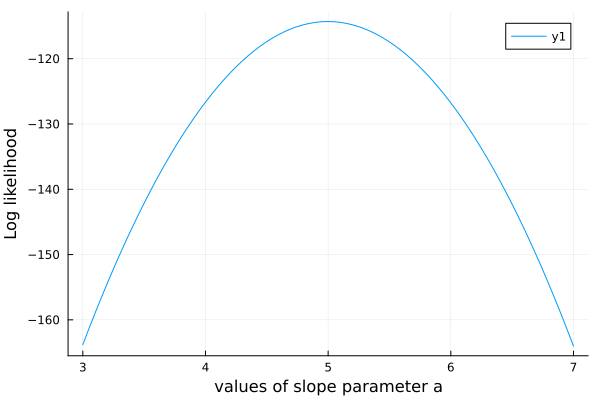

In [19]:
# 3. Plotting the Likelihood Profile of the Slope a
slopevalues(x) = likelihood([x, trueB, trueSd])
slopelikelihoods = [slopevalues(a) for a in 3:0.05:7]
plot(3:0.05:7, slopelikelihoods, line=:solid, xlabel="values of slope parameter a", ylabel="Log likelihood")

In [20]:
### Defining the prior
function prior(param)
    a, b, sd = param
    aprior = logpdf(Uniform(0, 10), a)
    bprior = logpdf(Normal(0, 5), b)
    sdprior = logpdf(Uniform(0, 30), sd)
    return aprior + bprior + sdprior
end

prior (generic function with 1 method)

In [21]:
### Defining the posterior
function posterior(param)
    return likelihood(param) + prior(param)
end

posterior (generic function with 1 method)

In [6]:
# 1. Proposal Function
function proposalfunction(param)
    return [rand(Normal(param[i], [0.1, 0.5, 0.3][i])) for i in 1:3]
end

# 2. Metropolis MCMC Function
function run_metropolis_MCMC(startvalue, iterations)
    chain = zeros(iterations + 1, 3)
    chain[1, :] = startvalue
    for i in 1:iterations
        proposal = proposalfunction(chain[i, :])
        probab = exp(posterior(proposal) - posterior(chain[i, :]))
        if rand() < probab
            chain[i + 1, :] = proposal
        else
            chain[i + 1, :] = chain[i, :]
        end
    end
    return chain
end

# 3. Running the MCMC and Analyzing Results
using Plots

startvalue = [4, 0, 10]
chain = run_metropolis_MCMC(startvalue, 10000)

burnIn = 5000
acceptance = 1 - mean(unique(chain[burnIn+1:end, :]))

# Plotting code (using Plots.jl package in Julia)


-3.4688374015860592

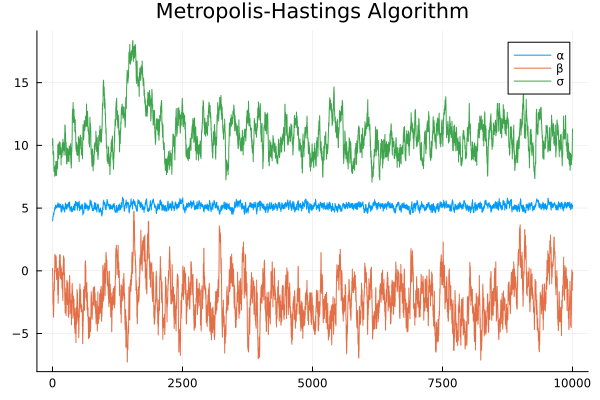

In [16]:
plot(chain[:,1], label = "α", title = "Metropolis-Hastings Algorithm")
plot!(chain[:,2], label = "β")
plot!(chain[:,3], label = "σ")

In [28]:
Pkg.add("GLM")
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.9/Project.toml`
  [a93c6f00] + DataFrames v1.6.1
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


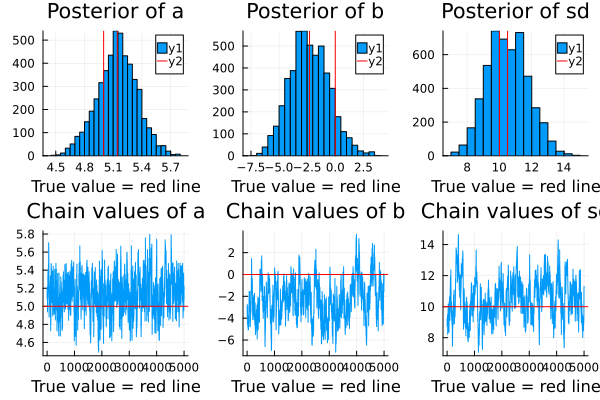

In [37]:
# 1. Setting up Multiple Plots
using Plots, DataFrames
layout = @layout([a b c; d e f])

# 2. Histograms and Line Plots
# Histograms for parameters a, b, and sd
p1 = histogram(chain[burnIn+1:end, 1], bins=30, title="Posterior of a", xlabel="True value = red line")
vline!(p1, [mean(chain[burnIn+1:end, 1]), trueA], color=:red)

p2 = histogram(chain[burnIn+1:end, 2], bins=30, title="Posterior of b", xlabel="True value = red line")
vline!(p2, [mean(chain[burnIn+1:end, 2]), trueB], color=:red)

p3 = histogram(chain[burnIn+1:end, 3], bins=30, title="Posterior of sd", xlabel="True value = red line")
vline!(p3, [mean(chain[burnIn+1:end, 3]), trueSd], color=:red)

# Line plots for chain values of a, b, and sd
p4 = plot(chain[burnIn+1:end, 1], title="Chain values of a", xlabel="True value = red line", legend=false)
hline!(p4, [trueA], color=:red)

p5 = plot(chain[burnIn+1:end, 2], title="Chain values of b", xlabel="True value = red line", legend=false)
hline!(p5, [trueB], color=:red)

p6 = plot(chain[burnIn+1:end, 3], title="Chain values of sd", xlabel="True value = red line", legend=false)
hline!(p6, [trueSd], color=:red)

# Combine plots
plot(p1, p2, p3, p4, p5, p6, layout=layout)


The following table gives the equivalence of the variables used in the pseudo-code to the variables used in the Julia code:


| Theory      | Code        |
| ----------- | ----------- |
| $\theta$    | chain[,]    |
| $u$         | rand()    |
| $a(\theta_i, \theta^*)$ | probab |
| $\min \big\{  \frac{\pi(\vartheta\|D)q(\vartheta,\theta)}{\pi(\theta\|D)q(\theta,\vartheta)}  \big\}$ | exp(posterior(proposal) - posterior(chain[i, :]))|
| $\theta_0$| [4, 0, 10]|
| $\theta^*$| proposal|
